# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 36275 rows and 19 columns in the dataset.


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* Most of the data type are numerical, except from `Booking_ID`, `room_type_reserved`, `market_segment_type`, and `booking_status` that are object data type. All looks fine and matches what we can expect from the description in the data dictionary, `Booking_ID` may include some letters that make it an object data type.

In [6]:
# checkinf for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values.

In [7]:
# checking for duplicate values in the data
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


<IPython.core.display.Javascript object>

In [8]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [9]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

**Observations:**
* The max number of of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel is 7, and the median is 1.
* The max number of of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel is 17, and the median is 2.
* There are guests (at least one) that booked the hotel more than a year in before the trip (443 days), but there avarage is almost three month (~85 days).
* The dataset includes booking from 2017 and 2018.
* The max number of previous cancellations is 13, and the max number of previous bookings that were not cancelled is 58.
* The avarage of the avarage price payed per room is €103, while the lower avarage is 0 (which looks not normal, we'll check it in more detail) and the higer avarage is €540 (which is high but normal).
* The maximum special request is 5, but most of the clients don't ask for special requests.
* Some of the columns use 0-1 to encode the information, for this type of variables we will count the values for further analysis.
* Booking_ID has no statistical value, and doesn't provide any meaningful information, it's just an id. We've already checked and there are no duplicates, therefore we'll drop this columns.

In [11]:
# Dropping booking_id
df.drop("Booking_ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# For most of the columns we can do a counting of unique values to better analyze them.
excl_columns = "lead_time", "arrival_date", "avg_price_per_room"
cat_columns = df.loc[:, ~df.columns.str.startswith(excl_columns)]

<IPython.core.display.Javascript object>

In [13]:
# For most of the columns we can do a counting of unique values to better analyze them.
cat_columns = df.loc[:, ~df.columns.str.startswith("avg_price_per_room")]

<IPython.core.display.Javascript object>

In [14]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(1))
    print("*" * 50)
    print("")

Unique values in no_of_adults are :
2   0.71972
1   0.21213
3   0.06387
0   0.00383
4   0.00044
Name: no_of_adults, dtype: float64
**************************************************

Unique values in no_of_children are :
0    0.92562
1    0.04460
2    0.02917
3    0.00052
9    0.00006
10   0.00003
Name: no_of_children, dtype: float64
**************************************************

Unique values in no_of_weekend_nights are :
0   0.46511
1   0.27553
2   0.25006
3   0.00422
4   0.00356
5   0.00094
6   0.00055
7   0.00003
Name: no_of_weekend_nights, dtype: float64
**************************************************

Unique values in no_of_week_nights are :
2    0.31548
1    0.26156
3    0.21610
4    0.08243
0    0.06580
5    0.04449
6    0.00521
7    0.00312
10   0.00171
8    0.00171
9    0.00094
11   0.00047
15   0.00028
12   0.00025
14   0.00019
13   0.00014
17   0.00008
16   0.00006
Name: no_of_week_nights, dtype: float64
**************************************************

Unique val

<IPython.core.display.Javascript object>

**Observations:** 
* The vast majority of the rooms were booked for two adults, ~72%. There are some rooms with 0 adults. As children cannot legally book a hotel room, we'll need to analyze if this is reasonable or the product of an uploading error.
* The percentage of rooms booked for children is low, and if there are children, only one child is most common. Some reservations included 9 and 10 children, which looks unusual. 
* Most of the reservations included at least one weekend night: ~27% 1 night, and ~25% two nights.
* ~26% of the reservations were for one week night, ~31% two week nights, and ~21% three week nights.
* More than 3/4 of the customers booked a meal plan that only includes breakfast.
* 97% of the customers didn't ask for a parking space.
* Rooms are encoded under seven types, from Type 1 to Type 7. Room Type 1 was the most popular with 77% of bookings, followed by Type 4 with 16%.
* 82% of the reservations were for staying during 2018, and 18% for 2017.
* August, September and Octuber are the most popular month for arrivals.
* `market_segment_type` has five possible categories: Online, Offline, Corporate, Complementary, and Aviation. Most of the reservations corresponded to 'Online' (~64%)
* 99% of the customers have no previous cancellations.
* The percentage of previous 0 cancellations is 97%, and is consistent with most of the customers not having previous cancellations. Although there are some customers that have many previous cancellations, the max number of cancellations is 46.
* 54% of the customers didn't ask for special request. If customers asked for request, most of them only asked for one (31% out of the total) or two request (12% out of the total).
* Our target variable `booking_status` has two possible values, as we expected: 67% not-canceled, 33% canceled.

#### Checking if 0 is a possible value for `avg_price_per_room`

In [15]:
df.groupby("market_segment_type")["avg_price_per_room"].min()

market_segment_type
Aviation        79.00000
Complementary    0.00000
Corporate       31.00000
Offline         12.00000
Online           0.00000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [16]:
df.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
df_complementary = df.loc[df["market_segment_type"] == "Complementary"]
df_complementary["avg_price_per_room"].value_counts()

0.00000      354
6.00000        7
2.00000        3
9.00000        2
3.00000        2
55.00000       2
20.00000       2
65.00000       2
1.00000        2
1.60000        1
29.00000       1
56.00000       1
4.50000        1
75.00000       1
37.33000       1
55.50000       1
170.00000      1
42.00000       1
79.00000       1
70.00000       1
6.50000        1
74.00000       1
139.00000      1
35.00000       1
Name: avg_price_per_room, dtype: int64

<IPython.core.display.Javascript object>

* Complementary rooms may be part of a benefits program or something similar that allows customers to book rooms for free. It is also possible that customers booking online apply discount cupons to book the hotel for free. Therefore we will assume 0 is a possible value for these market segments.

#### Checking if 0 is a possible value for `no_of_adults`

In [18]:
df.loc[data["no_of_adults"] == 0].shape[0]

139

<IPython.core.display.Javascript object>

In [19]:
df.loc[data["no_of_adults"] == 0, ["no_of_children"]].shape[0]

139

<IPython.core.display.Javascript object>

In [20]:
df.shape[0]

36275

<IPython.core.display.Javascript object>

In [21]:
data.Booking_ID.unique().shape[0]

36275

<IPython.core.display.Javascript object>

* After comparing the total number of rooms booked for/by children, we observe the number is also 139, the same number of rooms with no adults. This indicates that although  rooms for adults and children have been booked together, each room is assigned a different 'Booking_ID' and stored in an individual line in the dataset. Consequently, there is no need to fix these entries.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Booking Status

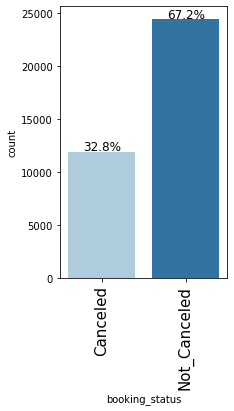

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "booking_status", perc=True)

* 67.2% of the bookings were not canceled, about 25000 rooms.
* 32.8% of the bookings were canceled by the customers, about 12000 rooms. 

#### Number of adults

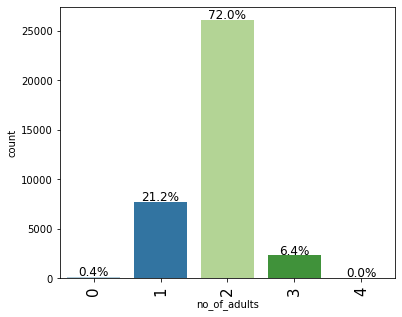

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "no_of_adults", perc=True)

* 72% of the rooms were booked for two adults. The max number of adults that booked a room is 4, but the percentage is so low that is rounded up to 0. The second most popular choice are rooms booked for one adult.

#### Number of children

In [25]:
df["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

* It looks suspicious that there are 2 rooms booked for 9 kids, and 1 room for 10 kids. We know from our previous analysis that although rooms may be book together (for example a family booked one room for two kids and one room for two adults), each room is assigned a unique booking id and stored in a separate line. Therefore this information is suggesting there are rooms that can host 9 and 10 guests. We understand this is an error, we will replace these extreme values with the higher number of children in the rest of the dataset (that's 3).

In [26]:
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

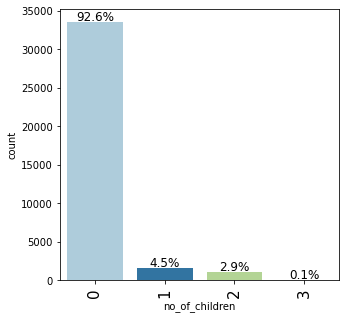

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "no_of_children", perc=True)

In [28]:
df["no_of_children"].value_counts()

0    33577
1     1618
2     1058
3       22
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

* Almost all the reservations didn't include children (92.5%). 
* 4.5% of the reservations included 1 children, 2.9% 2 children, and 0.1% 3 children.
* It is clear that the target of INN Hotels is mostly couples, or groups of 2 adults, without children.

#### Number of weekend nights

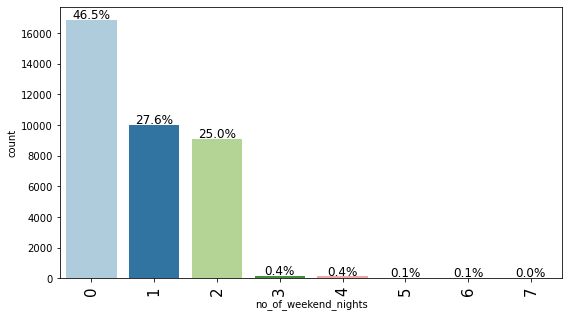

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

* 25% of the customers booked a whole weekeend in the hotel (maybe some weekdays too).
* 27.6% booked one weekend night, in addition to weeknights or not.
* 46.5% didn't book weekend nights.
* The percentage of customers that booked rooms for three weekend nights or more is low. 

#### Number of week nights

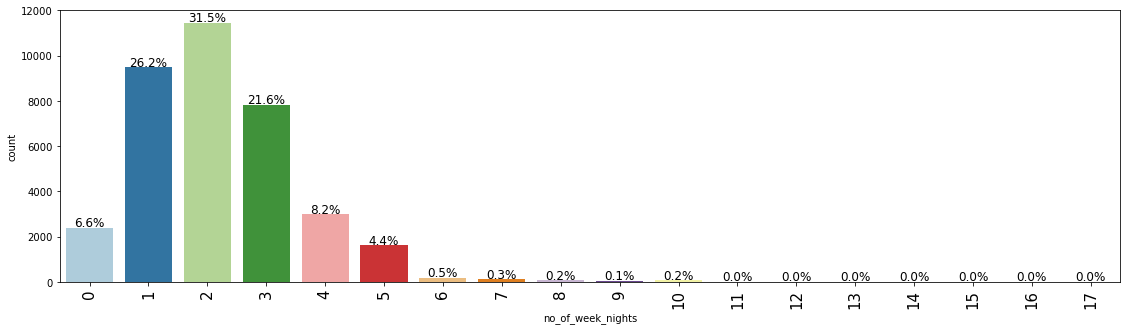

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "no_of_week_nights", perc=True)

* 6.6% of the customers booked a room for weekend nights only.
* For those customers that booked a room for week nights, 31.5% did it for 2 nights, 26.2% for one night, and 21.6% for three nights. 
* All in all, customers usually don't book the hotel for more than 7 nights in total (including week and weekend nights)

#### Type of meal plan

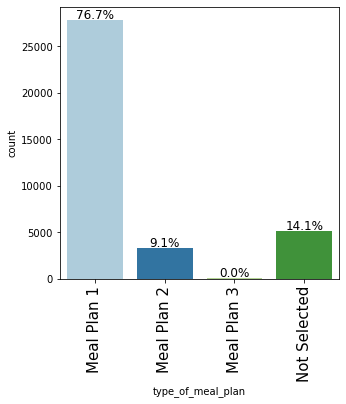

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

In [32]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

* 76.7% of customers preferred a plan that included breakfast.
* 14.1% decided not to get a meal plan (at least they didn't book it in advance).
* 9.1% choosed a plan that includs breakfast and one other meal.
* Only 5 customers out of 36275 requested a full board plan (breakfast, lunch, and dinner)

#### Required car parking space

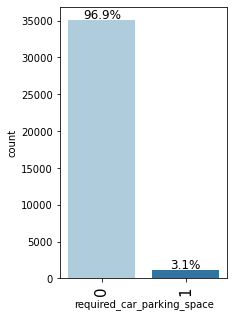

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "required_car_parking_space", perc=True)

* The vast majority of the reservations didn't include car parking space 96.9%. 

#### Room type reserved

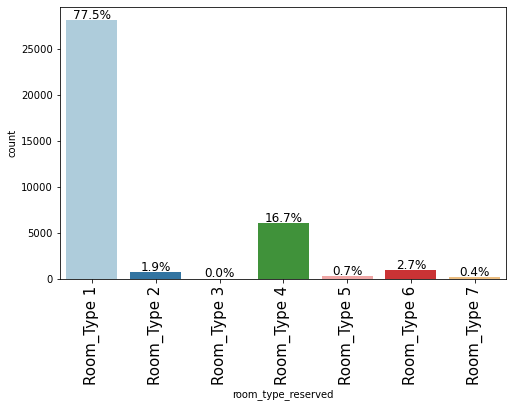

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "room_type_reserved", perc=True)

* Type 1 room has the larger number of reservations, more than 25000, that is 77.5% of the total. The value of the rooms is encoded, therefore we don't know it. 

#### Arrival year

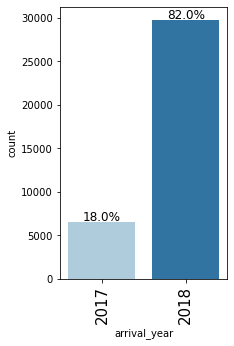

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "arrival_year", perc=True)

* The dataset contains information that is mostly for 2018 (82%), the other 12% corresponds to 2017.

#### Arrival month

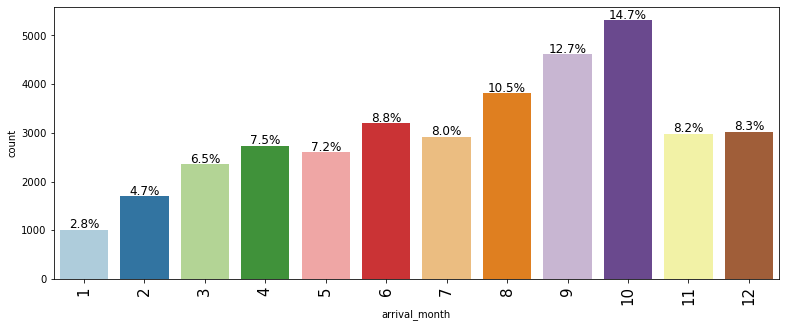

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "arrival_month", perc=True)

* The most popular month for arrival are October, September, August (from more to less), during the late summer and the early fall season

#### Market segment type

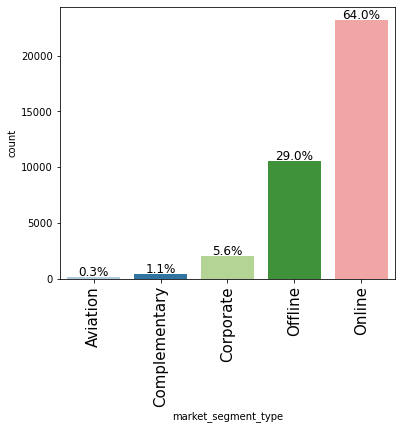

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "market_segment_type", perc=True)

* Most of the reservations correspond to the Online segment (64%), follow by Offline (29%), Corporate (5.6%), Complementary (1.1%), and Aviation (0.3%)

#### Repeated guest

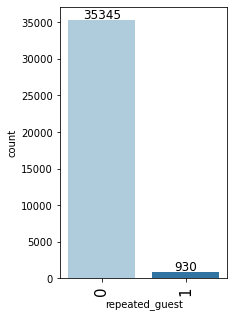

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "repeated_guest")

* Most of the reservations are made by new customers (97.4%)

#### Number of previous cancellations

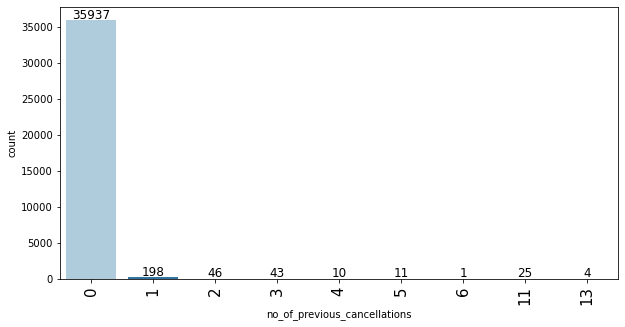

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "no_of_previous_cancellations")

* Considering most of the customers are new, the number of customers with previous cancellations is also very low. Most of the customers (almost 36000) have no previous cancellations. No cancellations is follow by only one cancellation (198). There are also a few customers with many previous cancellations, for example 4 customers have 13 previous cancellations.

#### Number of previous bookings not canceled

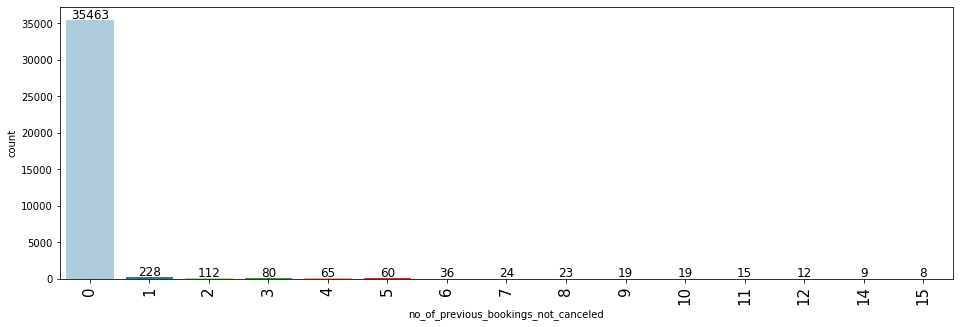

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", n=15)

* Coincidentally, there are 35463 customers with 0 previous bookings not canceled. We know there are 35345 new customers, therefore only 118 customers (out of 35463) have actually done previous bookings and cancelled them. Then 228 customers had one previous booking not canceled, 112 had 2, 8 had 3. As we can expect, as the number of previous bookings increases, the number of customers decreases. 

#### Number of special requests

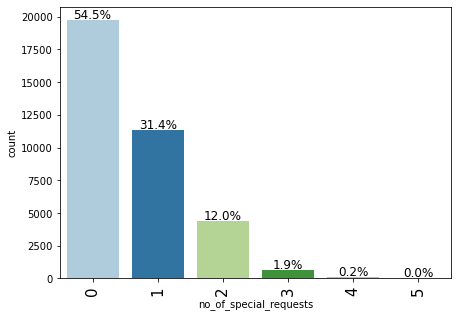

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "no_of_special_requests", perc=True)

* More than half of the customers did't ask for special requests (54.5%). If the customers had special requests, 31.4% only had one, 12% had 2, 1.9% had 3. A really low percentage of customers had 4 or 5 special requests.

In [42]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Lead time

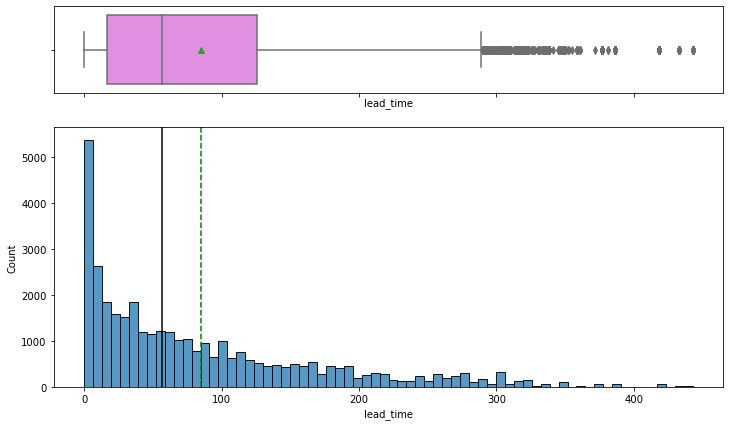

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(df, "lead_time")

In [44]:
df["lead_time"].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
324       1
325       1
348       1
328       1
351       1
Name: lead_time, Length: 352, dtype: int64

<IPython.core.display.Javascript object>

* The avarage number of days between the arrival and booking date is about 90 days, three month. 
* Althought there are some customers that booked the hotel more than one year in advance, the most frequent lead time is 0 days (1297 reservations), followed by one day (1078 reservations). The number of customers that booked their room 2, 3 or 4 days in adanve is about the same (less than 650 count each).

#### Arrival date

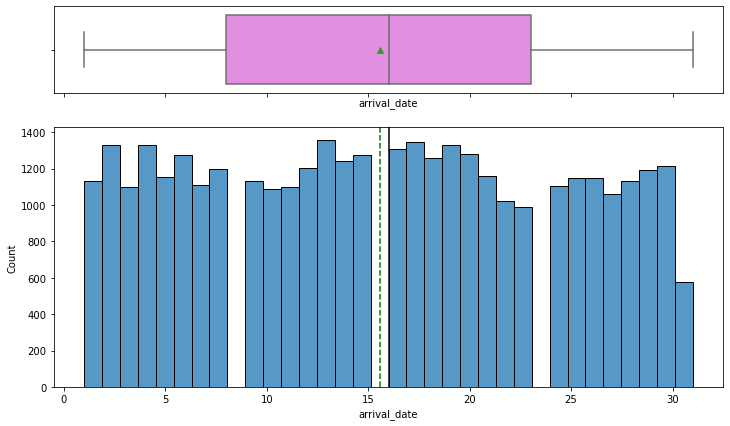

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(df, "arrival_date")

* The arrival data looks evenly distributed among all the possible days of the month.

#### Avarage price per room

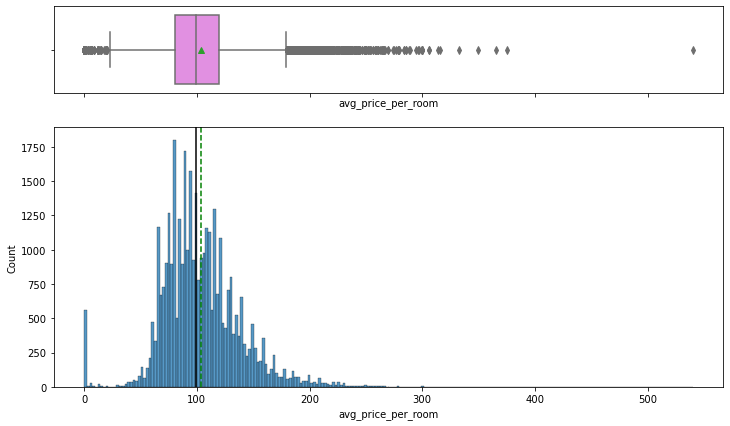

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df, "avg_price_per_room")

* The avarage price per room is a bit more than 100 euros, and the median price is a bit less. 
* As we already know, there are some rooms that were booked for free or at a really low price.
* The distribution curve looks normal but with a long right tale. There are also outliers on both ends of the distribution. We'll analyze this in more detail to find out if they need to be treated.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [47]:
# Function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### 1. What are the busiest months in the hotel?

In [48]:
df.loc[df["booking_status"] != "Canceled"]["arrival_month"].value_counts(1)

10   0.14092
9    0.12599
12   0.10738
8    0.09533
11   0.08631
6    0.07839
4    0.07138
3    0.06798
5    0.06765
7    0.06585
2    0.05223
1    0.04059
Name: arrival_month, dtype: float64

<IPython.core.display.Javascript object>

* With 14% of the total reservations that were not canceled starting on this month, October is the busiest month in the hotel.

In [49]:
df_reservation = df.loc[df["booking_status"] != "Canceled"]

<IPython.core.display.Javascript object>

In [50]:
children_reserv = df_reservation.groupby("arrival_month")["no_of_children"].sum()
children_reserv

arrival_month
1      58
2     128
3     143
4     183
5     119
6     130
7     275
8     418
9     218
10    241
11     92
12    323
Name: no_of_children, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
adult_reserv = df_reservation.groupby("arrival_month")["no_of_adults"].sum()
adult_reserv

arrival_month
1     1606
2     2203
3     3056
4     3311
5     3003
6     3304
7     3187
8     4546
9     5492
10    5966
11    3631
12    4926
Name: no_of_adults, dtype: int64

<IPython.core.display.Javascript object>

In [52]:
children_reserv + adult_reserv

arrival_month
1     1664
2     2331
3     3199
4     3494
5     3122
6     3434
7     3462
8     4964
9     5710
10    6207
11    3723
12    5249
dtype: int64

<IPython.core.display.Javascript object>

* October is also the busiest month considering the number of guests staying in the hotel. The total number of guest in october reaches 6207 (5966 adults and 241 children). 
* If we analyze the age distribution, August is the month with the higher number of children staying in the hotel (418 in total).

#### 2. Which market segment do most of the guests come from?

In [53]:
df["market_segment_type"].value_counts(1)

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

<IPython.core.display.Javascript object>

* Most of the guests come from the Online segment. The online segment leads the market and concentrates 64% of the bookings. The offline market comes second with almost 30% of the market.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [54]:
df.groupby("market_segment_type")["avg_price_per_room"].mean()

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

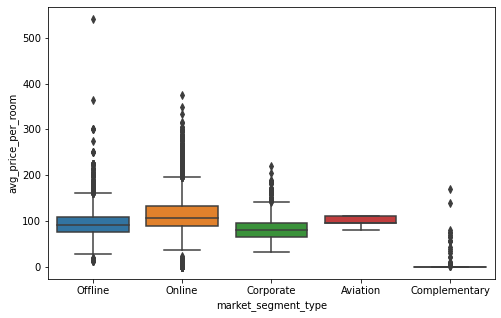

<IPython.core.display.Javascript object>

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room")
plt.show()

* The avarage price per room in the Online segment is 112 euros, and it is the segment with higher avarage price.
* The Aviations segment has an avarage price of 100 euros, the Offline sement about 92 euros, and the Corporate segment about 83 euros.
* As we have already noticed, the Complementary segment has a really low avarage price (about 3 euros). This is consistent with the idea of a complementary segment.
* All price segments have outliers, except from Aviation. The offline segment present at least one outlier that is way farther from the upper whisker than the others. We'll analyze this in more detail.

#### 4. What percentage of bookings are canceled? 

In [56]:
df["booking_status"].value_counts(1)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

* 32.76% of bookings are canceled.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [57]:
df.groupby("repeated_guest")["booking_status"].value_counts(1)

repeated_guest  booking_status
0               Not_Canceled     0.66420
                Canceled         0.33580
1               Not_Canceled     0.98280
                Canceled         0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


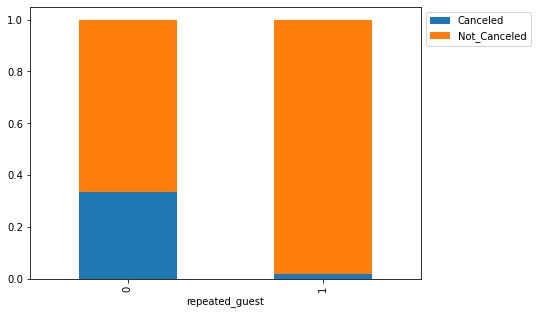

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "repeated_guest", "booking_status")

* 98.3% of the repeated guest did not cancel their reservations, meaning only 1.7% of repeated customers did cancel their reservations.
* Almost all cancellations came from new customers. About 33% of the new customers canceled their reservation. 

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

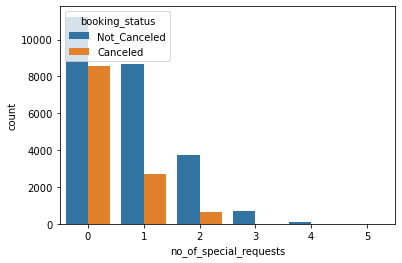

<IPython.core.display.Javascript object>

In [59]:
sns.countplot(data=df, x="no_of_special_requests", hue="booking_status")

* Although the proportion of not canceled status is higher than canceled for all number of possible request, as the number of special requests increases, the proportion of cancel status decreases. 

### Bivariate Analysis

* Now we'll analyze more in details the relationship between the predictors and our target variable `booking_status`.

In [60]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Avarage price per room vs Booking status**

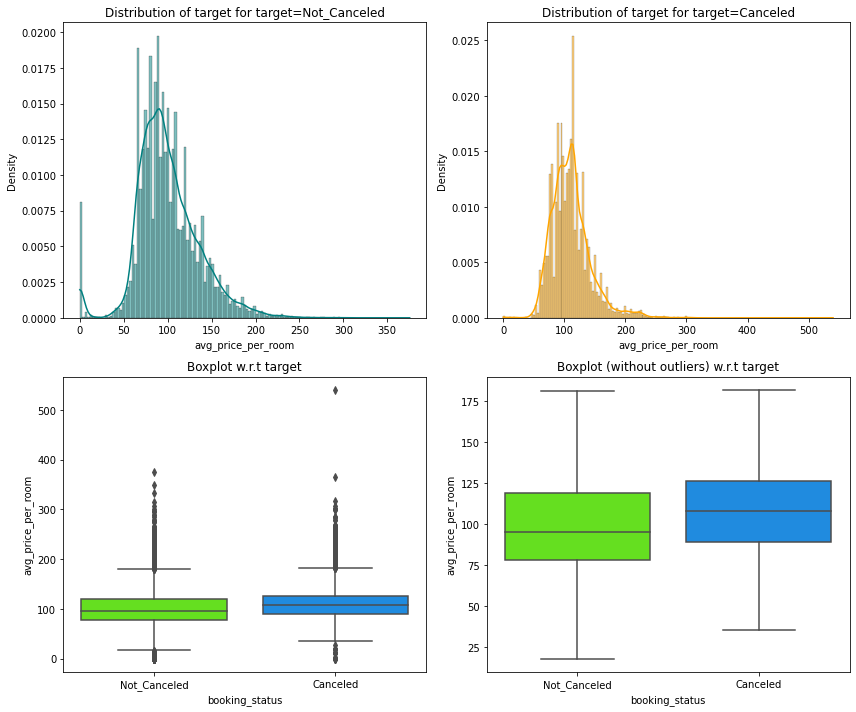

<IPython.core.display.Javascript object>

In [61]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* When we compare the avarage price per room distribution by class, we can observe that `Not_Canceled` has a lower avarage price. 
* In the case of `Not_Canceled` the peak is around 100 euros, and in the case of `Canceled` a bit less than 150.
* The price range is also wider in the case of class `Canceled`.
* We can observe a tendency to cancel more the rooms that are more expensive.

**Lead time vs Booking status**

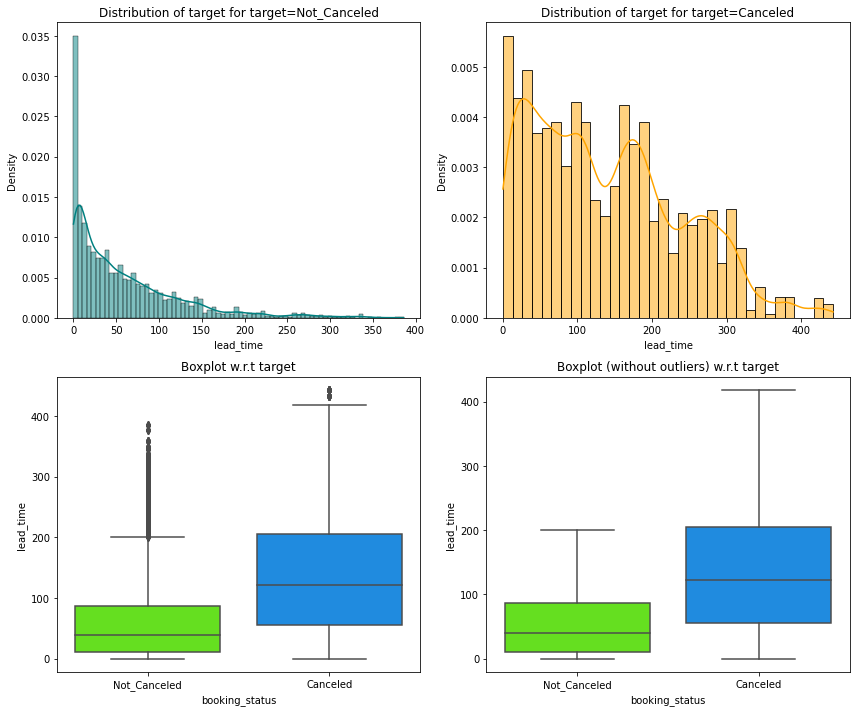

<IPython.core.display.Javascript object>

In [62]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

* The number of `Not_Canceled` rooms decreases when the `lead_time` increases, showing a negative correlation between the two. 
* That is also true for`Canceled` but the relationship between the two is not that direct. The curve does not decrease so abruptly.
* As we can imagine, for `Not_Canceled` the highes density corresponds to 0 lead time.

**Arrival date vs Booking status**

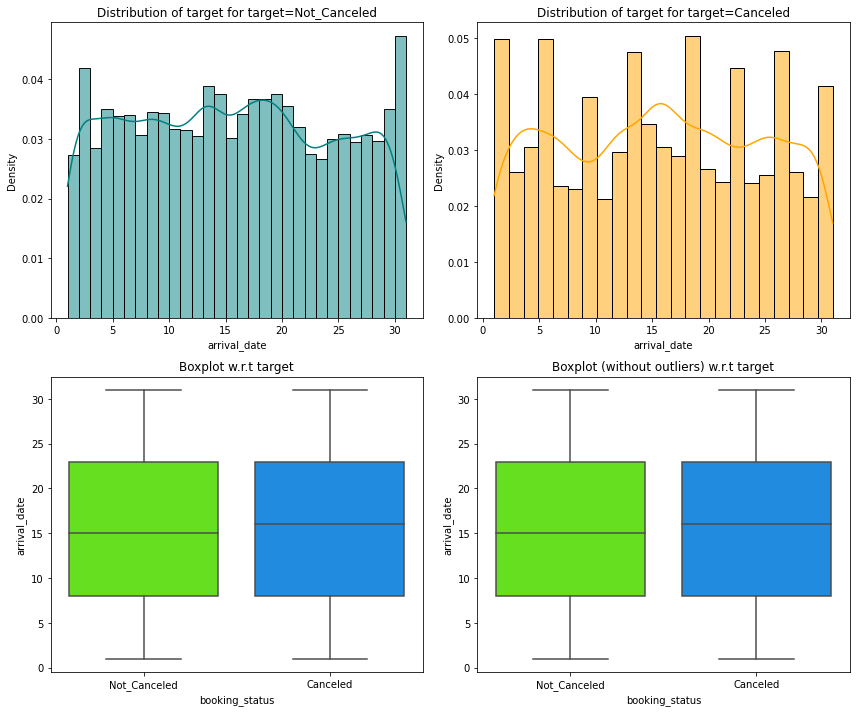

<IPython.core.display.Javascript object>

In [63]:
distribution_plot_wrt_target(df, "arrival_date", "booking_status")

* In this case the distribution of Canceled and Not Canceled is similar.

**Type of meal plan vs Booking status**

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


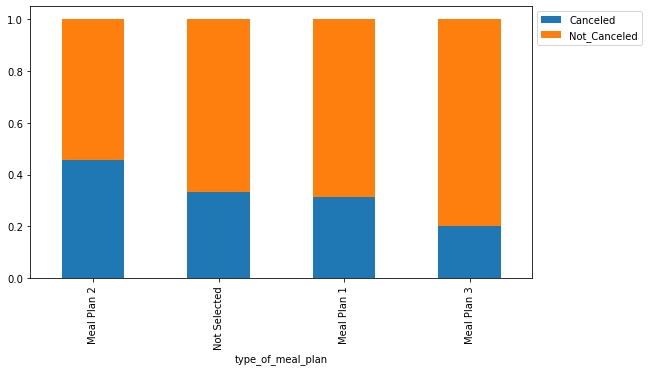

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* Meal Plan 2 presents the highest proportion of canceled reservations, and Meal Plan 3 the lowest.
* Meal Plan 1 and Not Selected have a similar proportion of cancellation.

**Room type vs Booking status**

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


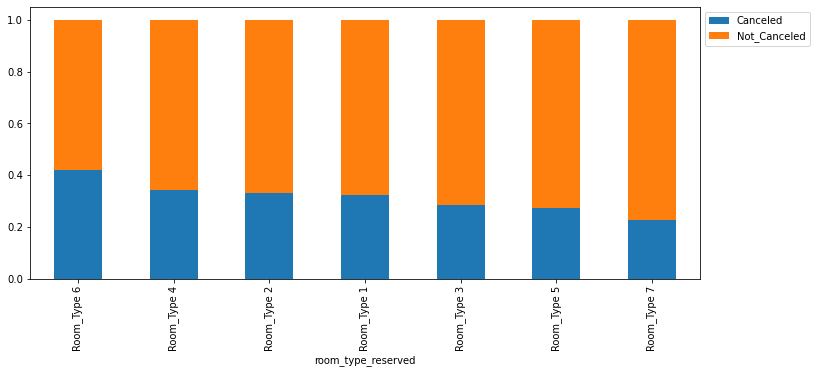

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot(df, "room_type_reserved", "booking_status")

* Room type 7 has the highest proportion of rooms not canceled, and Room type 6 the lowest. The other room types proportion between canceled and not canceled look similiar.

**Arrival month vs booking status**

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


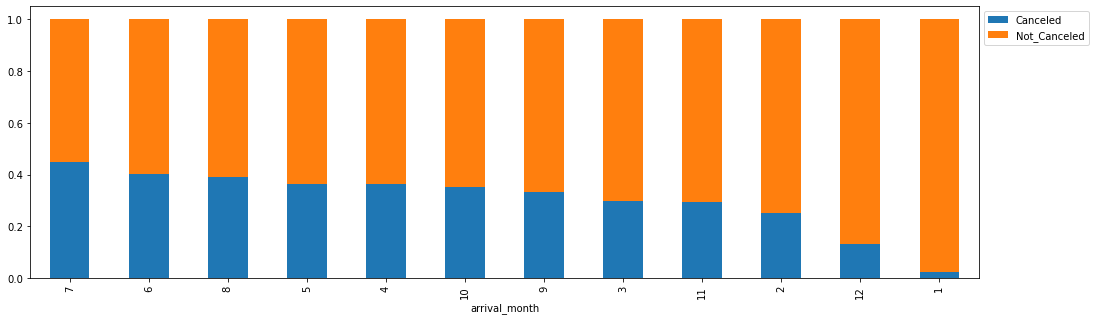

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(df, "arrival_month", "booking_status")

* January is the month with the lower proportion of canceled rooms, and July has the highest cancellation rate.
* December also presents a a high proportion of rooms not canceled.
* The other month have a similiar proportion of canceled and not canceled.
* For all months the proportion of not canceles is higher than canceled.

**Arrival year vs Booking status**

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


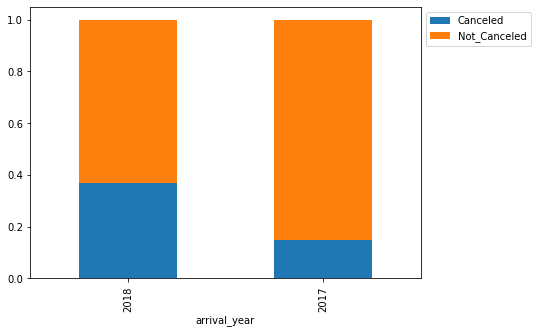

<IPython.core.display.Javascript object>

In [67]:
stacked_barplot(df, "arrival_year", "booking_status")

* Year 2018 present a higer proportion of canceled reservations.

**Market segments type vs Booking status**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


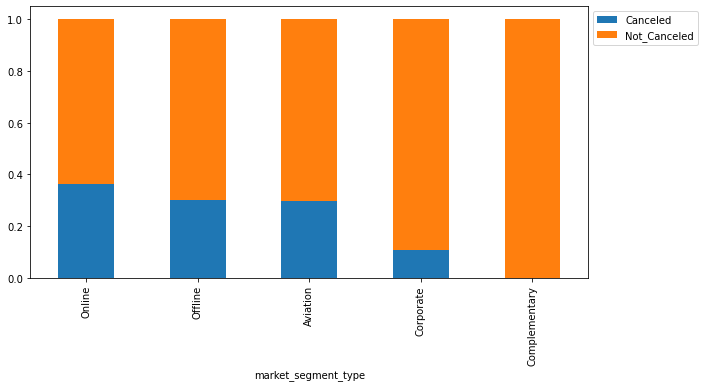

<IPython.core.display.Javascript object>

In [68]:
stacked_barplot(df, "market_segment_type", "booking_status")

* As we can expect, Complementary rooms have 0 cancellations.
* The aviation and offline segments show a very similiar proportion between canceled and not canceled.
* Online segment has the highest rate of cancellation, about 40%.
* Corporate segment, as we can also imagine, presents a low proportion of cancellation, about 10%.

**Number of previous cancellations vs Booking status**

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


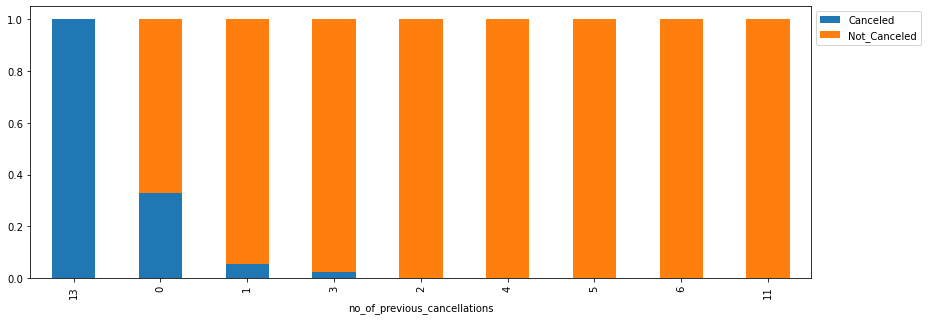

<IPython.core.display.Javascript object>

In [69]:
stacked_barplot(df, "no_of_previous_cancellations", "booking_status")

* This distribution looks counterintuitive, customers with 2, 4, 5, 6, and 11 previous cancellation did not cancel at all. And  customers with 13 previous cancellations, cancell all their reservations. 
* The cancellation rate is also pretty low for customers with 1 and 3 previous cancellations.
* People that has never made a reservation before canceled a bit less than 40% of their reservations.
* It is difficult to see a tendency in the relationship between these two variables.

**Number of weekend nights vs Booking status**

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


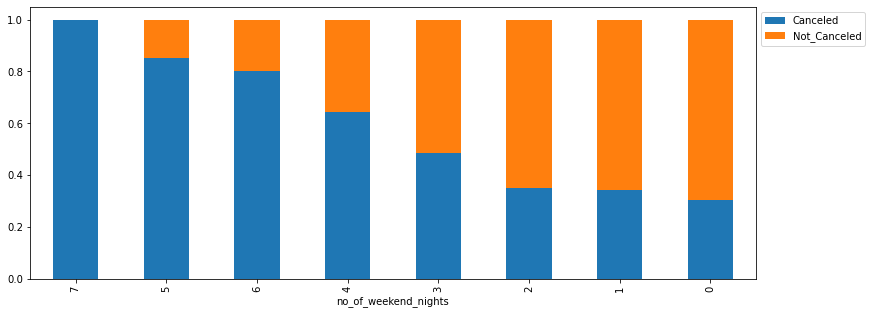

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

* The proportion between canceled and not canceled looks similiar in the case of 1 and 0 weekend nights.
* The cancellation rate increases when the number of weekend nights increases. 
* 7 weekend nights looks suspicious, but there are 20 reservatios for 6 weekend nights, from those 4 were not canceled.

**Number of week nights vs Booking status**

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

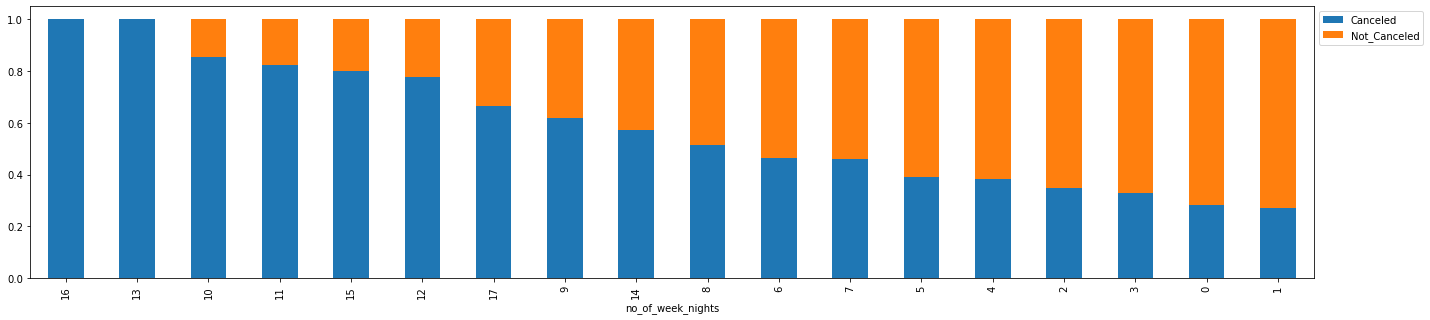

<IPython.core.display.Javascript object>

In [71]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

* Similar to weekend nights, when the number of week nights increases the cancellation rate does the same. 
* 13 and 16 weekend nights have 100% of bookings canceled.
* For 7 days and less the proportion of not canceled is higher than canceled.

In [72]:
# Before proceding we'll encode booking status.
# As we are interested in identifying what affects cancellation, the status 'Canceled' will be identify with 1
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

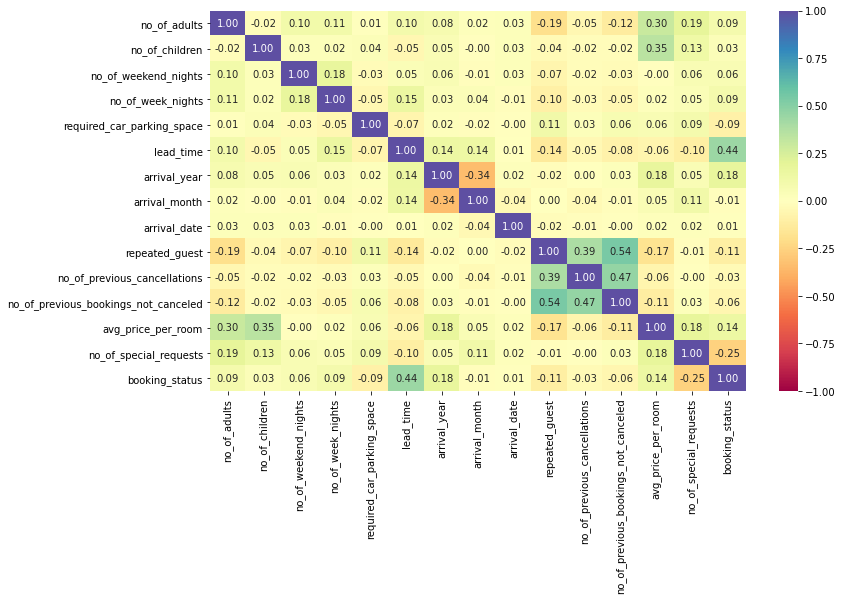

<IPython.core.display.Javascript object>

In [73]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are no variables highly correlated between each other nor with our target variable.
* The target variable `booking_status` has the highes positive correlation with `lead_tiem` (0.44), and the highest negative correlation with `no_of_special_requests` (-0.25).

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outliers detection and treatment

In [74]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

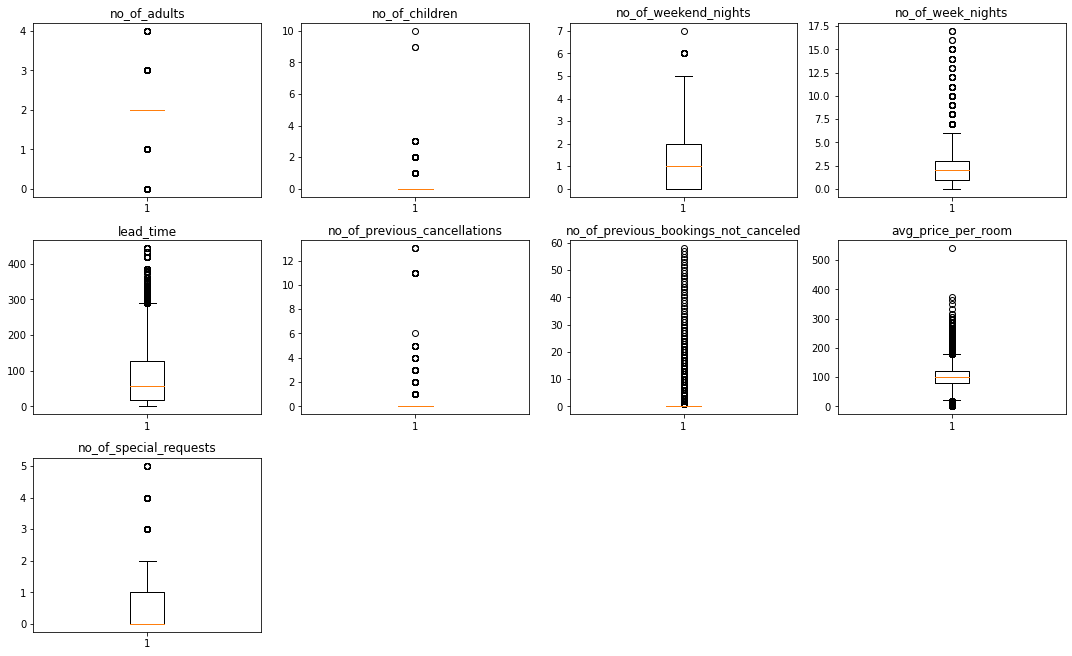

<IPython.core.display.Javascript object>

In [75]:
# selecting only numeric columns and dropping all the columns that are encoded using 0 and 1
# Also dropping all the arrival related columns since those are temporal variables.
numeric_columns = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
]
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the colums present outliers, but we have already analyzed them in the previous section and these are all values we can assume to be normal, and therefore we wo't treat them.
* There is only one exception, the avarage price per room. In this case, most of the outliers are grouped together between 200 and 400 but there is at least one outliers on the upper whisker with a value greater than 500. We'll treat it, and assign the value that correspods to the upper whisker.

In [76]:
# 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)
# 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)
# IQR
IQR = Q3 - Q1

# Upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [77]:
# replacing the autliers with the upper whisker value
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

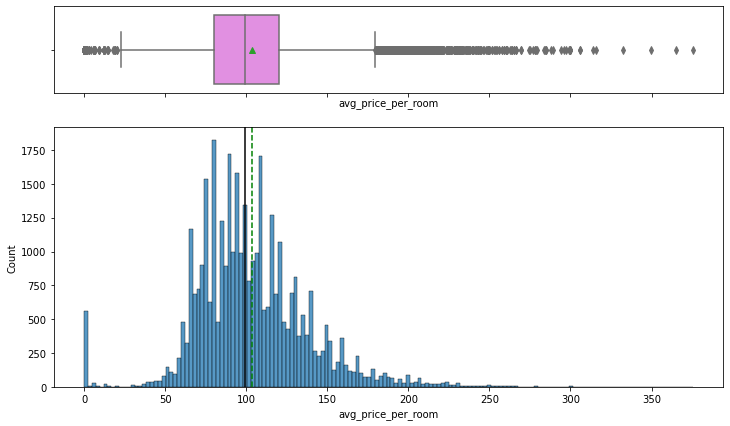

<IPython.core.display.Javascript object>

In [78]:
histogram_boxplot(df, "avg_price_per_room")

* After treating the most extreme outliers, the avarage price distribution goes from 0 to 350. 

### Preparing Data for Modeling

In [79]:
# Defining dependent and independent variable
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
# Adding parameter 'stratify' to evenly split the classes between train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [80]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

* The proportion of canceled and not canceled status is ~33% and ~67% respectively, for both train and test data.

### Model Evaluation Criteria

**Our model aims to predict cancellation, therefore a reservation that is cancel is a Positive case, and a reservation that is not cancel is a Negative case.**

### Model can make wrong predictions as:
1. Predicting a customer will cancel a reservation but in reality the person don't drop the booking. (False Positive-Type I error)
2. Predicting a customer won't cancel a reservation but in reality the person does drop the booking. (False Negative-Type II error)

### Which case is more important? 
* Both cases are important as:

* If we predict a person will cancel the reservation and that doesn't occur, the hotel may face different issues. The hotel will need to offer an alternative to the customer that may or may not satisfy the customer's need, and most probably that customer won't make other reservations in the future. This can also result in extra costs for the hotel.

* If we predict a person wpn't cancel a reservation but s/he does drop it, the hotel will loose money and the chance to offer that room to another customer if the cancellation is too late. 

### How to reduce this loss?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

**We will create a function to evaluate different metrics to check model's performance**

In [81]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
# Threshold is set at 0.5
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [82]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Fitting the model

In [83]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                  0.3321
Time:                        10:31:33   Log-Likelihood:                -10726.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.9564    121.335     -7.310      0.000   -1124.769    -649.144
no_of_adults                             0.0323      

<IPython.core.display.Javascript object>

**Training Performance**

In [84]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80679,0.63277,0.73985,0.68213


<IPython.core.display.Javascript object>

* The training model performance is pretty good for all measures. 
* Accuracy has the best performance, almost 81%. The total cases that were predicted correctly over the total entries in the set is high.
* Precision is almost 74%, meaning the model also does a good job in predicting true positive cases (customers that were identify to cancel and did cancel) over all positive predictions (those correctly and wrongly predicted as positive).
* Recall: Recall is 63% about 10 points less than precision. This means the model does a less better job identifing true positives out of all actual positives (true positives and false negatives).
* F1 scores has the lowerst performance, 0.68, meaning there are some imbalances between precision and recall (as we have already noticed).

*If we analyze the model*
* Negative values of the coefficient shows that probability of customer cancelling the reservation decreases with the increase of corresponding attribute value. For example: the number of requests and the number of special request or previous booking not canceled, we have observed these tendencies during the EDA. 

* Positive values of the coefficient show that that probability of customer cancelling the reservation increases with the increase of corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

* We'll use the the Variance Inflation Factor, or VIF, to detect multicolinearity. The predictors multicolinearity will be checked based on the following criteria:

**General Rule of thumb:**

* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.
* If VIF is exceeding 10, it shows signs of high multicollinearity.

In [85]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39624634.31385
no_of_adults                                  1.34705
no_of_children                                2.08820
no_of_weekend_nights                          1.06732
no_of_week_nights                             1.09435
required_car_parking_space                    1.03499
lead_time                                     1.40219
arrival_year                                  1.43432
arrival_month                                 1.27809
arrival_date                                  1.00771
repeated_guest                                1.75027
no_of_previous_cancellations                  1.32201
no_of_previous_bookings_not_canceled          1.57089
avg_price_per_room                            2.05023
no_of_special_requests                        1.24765
type_of_meal_plan_Meal Plan 2                 1.26322
type_of_meal_plan_Meal Plan 3                 1.00797
type_of_meal_plan_Not Selected                1

<IPython.core.display.Javascript object>

* The only variables that present high multicollinearity are market_segment dummy variables, therefore we won't drop them.

### Dropping non-significant variables (high p-value)

In [86]:
# running a loop to drop variables with high p-value
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [87]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [88]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                  0.3312
Time:                        10:31:37   Log-Likelihood:                -10742.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.4077    120.911     -7.191      0.000   -1106.388    -632.427
no_of_weekend_nights               0.1497      0.020      7.564      0.

<IPython.core.display.Javascript object>

**Training Performance**

In [89]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80663,0.63265,0.73950,0.68191


<IPython.core.display.Javascript object>

* Now our model contains only variables that are relevant in explaning our target. All the performance metrics remain almost the same.

## Building a Logistic Regression model

* **lg1** is our final model, it only contains relevant and not correlated variables. We'll now evaluate what is the best threshold to improve it's performance.

###  Converting coefficients to odds on training set
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [90]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.16153,1.03682,0.19886,1.01601,1.53653,0.95191,0.04623,1.33523,1.01925,0.22638,1.18026,1.23366,0.68845,0.76451,0.50213,0.47521,0.26776,0.41854,0.17012
Change_odd%,-100.00000,16.15325,3.68173,-80.11371,1.60134,53.65324,-4.80895,-95.37690,33.52334,1.92531,-77.36171,18.02564,23.36580,-31.15506,-23.54886,-49.78672,-52.47870,-73.22410,-58.14571,-82.98809


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Negative values of the coefficient shows that probability of customer cancelling the reservation decreases with the increase of corresponding attribute value. 

* Positive values of the coefficient show that that probability of customer cancelling the reservation increases with the increase of corresponding attribute value.

Among other influential variables, the predictors with a highest impact over cancellation are `required_car_parking_space`, `repeated_guest`, `no_of_special_requests`, `room_type_reserved_Room_Type7`, and `market_segment_type_Offline`.

* `required_car_parking_space`: Holding all other features constant, if a customer requires parking space it will decrease 80% the odds of cancelling the reservation.

* `repeated_guest`: Holding all other features constant, frequent customers have 93% less chances of cancelling the reservation.

Other predictors have a positive impact on cancelling the reservation, for example the number of nights (weekend nights have a higher impact than weeknights). Other predictors that increases the odds of cancelling are: `no_of_previous_cancellations` (that makes lot of sense), `type_of_meal_plan2`, and `type_of_meal_plan_Not Selected` among others.

### Performance evaluation on training set

**Default threshold 0.5**

**Confusion Matrix**

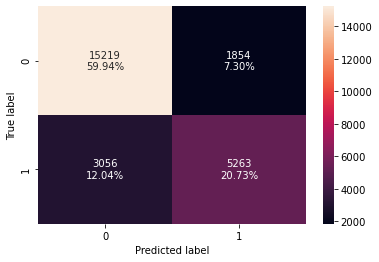

<IPython.core.display.Javascript object>

In [91]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [92]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Train performance:")
log_reg_model_train_perf

Train performance:


,Accuracy,Recall,Precision,F1
0,0.80663,0.63265,0.73950,0.68191


<IPython.core.display.Javascript object>

**ROC-AUC on training set**

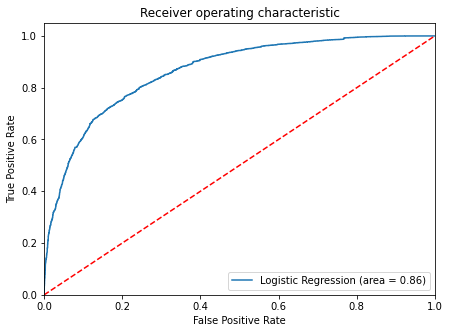

<IPython.core.display.Javascript object>

In [93]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Performance observations:**
* Our model is doing a better job in avoiding False Positives (Type I error) than False Negatives (Type II error). 
* 12% of the times customers were tagged as not cancelling, but they end up dropping their reservation (False Negatives). 
* 7.30% of the  predictions wrongly tagged a customer as someone that was going to cancel but didn't (False Positives).
* The AUC is 0.86/1 showing the performance of the model is good.
* As we are equally concerned about false negatives and false positives, we'll try to find a better threshold that gives us a higer F1 and therefore a better balance between these two performance measurements.

### Model Performance Improvements

* We'll try to further improve the f1 score by changing the model threshold using AUC-ROC Curve.

In [94]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3330075333683695


<IPython.core.display.Javascript object>

**0.33 threshold performance**

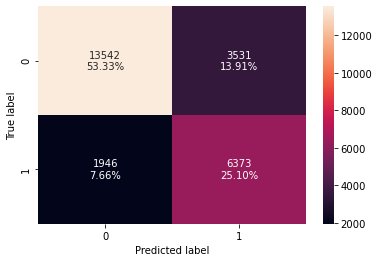

<IPython.core.display.Javascript object>

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [96]:
# checking model performance using AUC_ROC threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78430,0.76608,0.64348,0.69945


<IPython.core.display.Javascript object>

**Observations:** 
* F1 score has improve from from 0.681 to 0.699, not a big change. 
* Recall has increased from 0.632 to 0.766, showing a bigger improvement.
* Accuracy and Precision have decreased, from 0.806 to 0.784 and from 0.739 to 0.643 respectively.
* False negatives percentage has decreased from 12% to 7.66%.
* False positives percentage has increased from 12% to 13.91%

#### Using Precision-Recall curve and see if we can find a better threshold

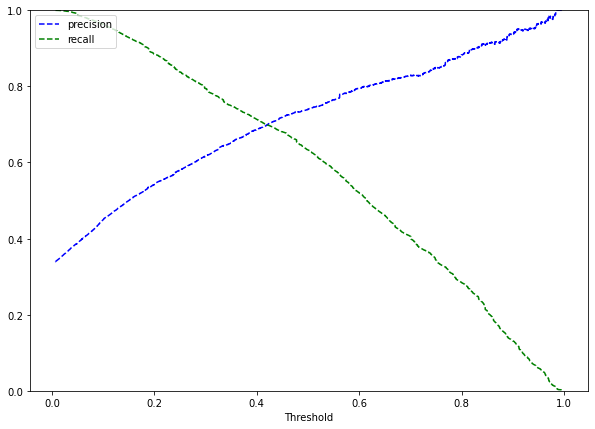

<IPython.core.display.Javascript object>

In [97]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* The optimal threshold is someplace betwen 0.4 and 0.45

**0.425 threshold performance**

In [98]:
# setting the threshold
optimal_threshold_curve = 0.425

<IPython.core.display.Javascript object>

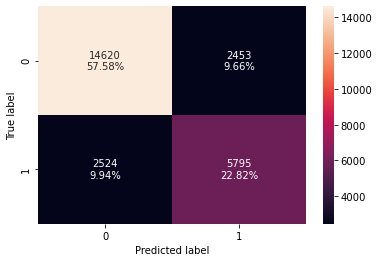

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [100]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80399,0.69660,0.70259,0.69958


<IPython.core.display.Javascript object>

**0.43 threshold**

In [101]:
# setting the threshold
optimal_threshold_curve = 0.43

<IPython.core.display.Javascript object>

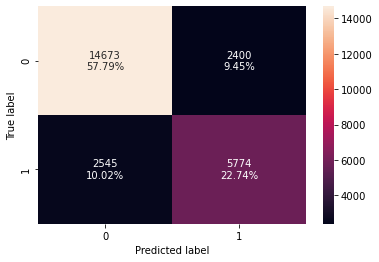

<IPython.core.display.Javascript object>

In [102]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [103]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80525,0.69407,0.70639,0.70018


<IPython.core.display.Javascript object>

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80663,0.78430,0.80525
Recall,0.63265,0.76608,0.69407
Precision,0.73950,0.64348,0.70639
F1,0.68191,0.69945,0.70018


<IPython.core.display.Javascript object>

### Test Performance

In [105]:
# Default threshold performance
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Train performance:")
log_reg_model_test_perf

Train performance:


,Accuracy,Recall,Precision,F1
0,0.80272,0.62619,0.73285,0.67534


<IPython.core.display.Javascript object>

In [106]:
# AUC-ROC threshold performance
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.77846,0.76612,0.63402,0.69384


<IPython.core.display.Javascript object>

In [107]:
# Optimal threshold curve performance
optimal_threshold_curve = 0.43
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79923,0.69013,0.69500,0.69256


<IPython.core.display.Javascript object>

In [108]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.43 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.43 Threshold
Accuracy,0.80272,0.77846,0.79923
Recall,0.62619,0.76612,0.69013
Precision,0.73285,0.63402,0.69500
F1,0.67534,0.69384,0.69256


<IPython.core.display.Javascript object>

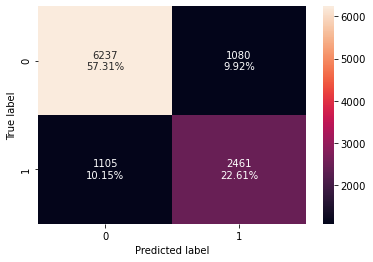

<IPython.core.display.Javascript object>

In [109]:
# creating confusion matrix on test set
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

## Final Model Summary

In [110]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 27 Feb 2022   Pseudo R-squ.:                  0.3312
Time:                        10:31:41   Log-Likelihood:                -10742.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.4077    120.911     -7.191      0.000   -1106.388    -632.427
no_of_weekend_nights               0.1497      0.020      7.564      0.

<IPython.core.display.Javascript object>

In [111]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.16153,1.03682,0.19886,1.01601,1.53653,0.95191,0.04623,1.33523,1.01925,0.22638,1.18026,1.23366,0.68845,0.76451,0.50213,0.47521,0.26776,0.41854,0.17012
Change_odd%,-100.00000,16.15325,3.68173,-80.11371,1.60134,53.65324,-4.80895,-95.37690,33.52334,1.92531,-77.36171,18.02564,23.36580,-31.15506,-23.54886,-49.78672,-52.47870,-73.22410,-58.14571,-82.98809


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Negative values of the coefficient shows that probability of customer cancelling the reservation decreases with the increase of corresponding attribute value. 

* Positive values of the coefficient show that that probability of customer cancelling the reservation increases with the increase of corresponding attribute value.

Among other influential variables, the predictors with a highest impact over cancellation are `required_car_parking_space`, `repeated_guest`, `no_of_special_requests`, `room_type_reserved_Room_Type7`, and `market_segment_type_Offline`.

* `required_car_parking_space`: Holding all other features constant, if a customer requires parking space it will decrease 80% the odds of cancelling the reservation.

* `repeated_guest`: Holding all other features constant, frequent customers have 93% less chances of cancelling the reservation.

Other predictors have a positive impact on cancelling the reservation, for example the number of nights (weekend nights have a higher impact than weeknights). Other predictors that increases the odds of cancelling are: `no_of_previous_cancellations` (that makes lot of sense), `type_of_meal_plan2`, and `type_of_meal_plan_Not Selected` among others.

### Selecting the best threshold

In [112]:
# Optimal threshold curve performance
optimal_threshold_curve = 0.43
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79923,0.69013,0.69500,0.69256


<IPython.core.display.Javascript object>

* Considering our objective of maximizin F1 score, the best threshold is 0.43. This threshold gives and F1 score of almost 70 and also presents a good performance for the other measures. 0.4 threshold keeps the score for the other measures not lower than 0.69, while threshold 0.5 gets a Recall score of 0.62, and threshold 0.33 a 0.63 Precision score.

## Building a Decision Tree model

In [113]:
# Defining dependent and independent variable
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]

# creating dummies
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
# Adding parameter 'stratify' to evenly split the classes between train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [114]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

**We will create a function to evaluate different metrics to check model's performance**

In [115]:
## Function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [116]:
# Function to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Fitting the model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* When we split the data between train and test set, we observed the frequency of class 0 and 1 are uneven. Class 0 frequency is 0.67238 and class 1 frequency is 0.32762.
* Class 0 will become the dominant class and the decision tree will become biased toward the dominant classes.
* In this case, we can pass a dictionary {0:0.33, 1:0.67} to the model to specify the weight of each class and the decision tree will give more weightage to class 0.

In [117]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, random_state=1
)

<IPython.core.display.Javascript object>

In [118]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

<IPython.core.display.Javascript object>

**Train model performance**

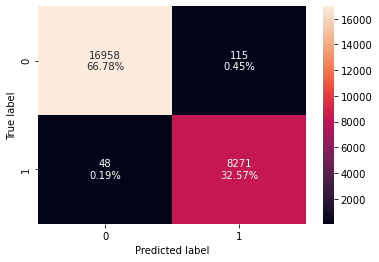

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(model, X_train, y_train)

In [120]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99358,0.99423,0.98629,0.99024


<IPython.core.display.Javascript object>

**Test model performance**

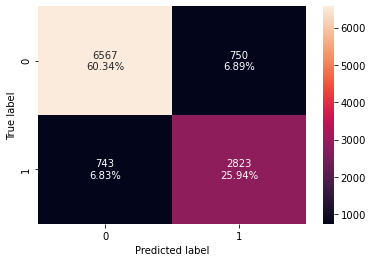

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_sklearn(model, X_test, y_test)

In [122]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86281,0.79164,0.79009,0.79087


<IPython.core.display.Javascript object>

### Visualizing the Three

In [123]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

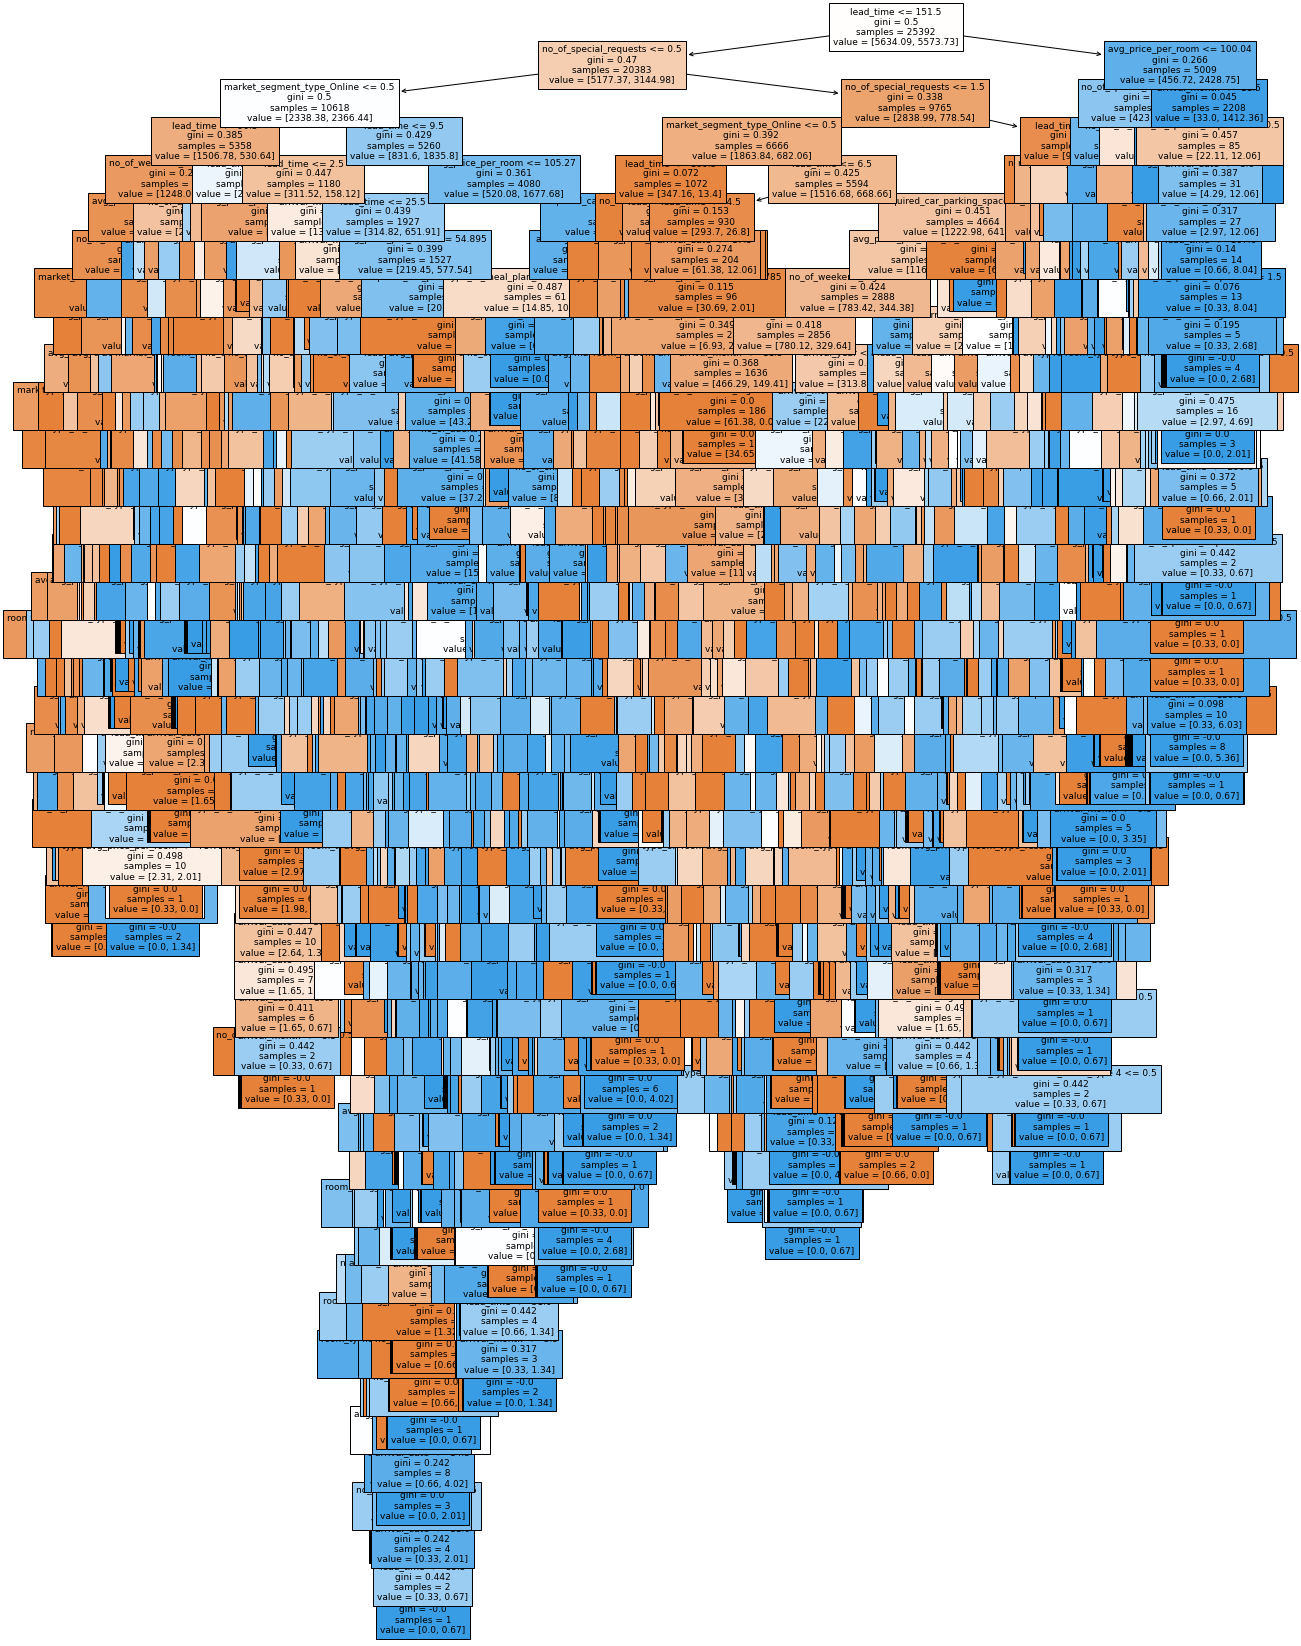

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [24.09, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   | 

<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35544
avg_price_per_room                   0.14255
market_segment_type_Online           0.09322
no_of_special_requests               0.09067
arrival_date                         0.07815
arrival_month                        0.06837
no_of_week_nights                    0.04438
no_of_weekend_nights                 0.03163
no_of_adults                         0.03003
arrival_year                         0.01829
market_segment_type_Offline          0.00807
type_of_meal_plan_Not Selected       0.00758
required_car_parking_space           0.00747
room_type_reserved_Room_Type 4       0.00692
no_of_children                       0.00440
type_of_meal_plan_Meal Plan 2        0.00430
room_type_reserved_Room_Type 2       0.00281
market_segment_type_Corporate        0.00189
repeated_guest                       0.00165
room_type_reserved_Room_Type 5       0.00093
room_type_reserved_Room_Type 6       0.00087
room_type_

<IPython.core.display.Javascript object>

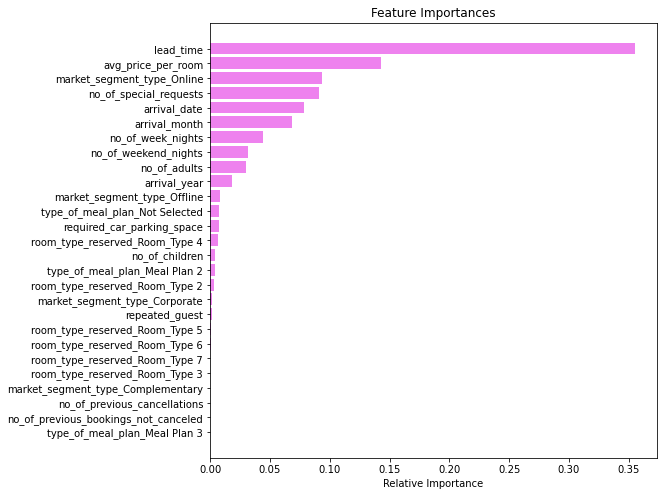

<IPython.core.display.Javascript object>

In [127]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, `lead_time` is the most important variable for predicting cancellation, followed by `avg_price_per_room`, `market_sement_type_Online`, and `no_of_special_requests`

**Observations:** It is clear that the model is overfitting the data, nontheless it's performance on test set was not that bad. Given the size of the tree, it is way too complex to interpret it's results. We'll need to prune it before we can use the Tree to make predictions.

## Pruning the Tree

#### Pre-Pruning

#### Using GridSearch for Hyperparameter tuning of our tree model

* We'll use GridSearch for tuning the hyperparameters of our model. 
* Grid search looks for the optimum values of hyperparameters. 

In [128]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=6,
                       max_leaf_nodes=50, min_samples_split=70, random_state=1)

<IPython.core.display.Javascript object>

**Checking performance on training set**

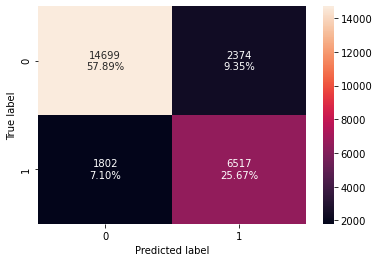

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [130]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83554,0.78339,0.73299,0.75735


<IPython.core.display.Javascript object>

**Checking performance on test set**

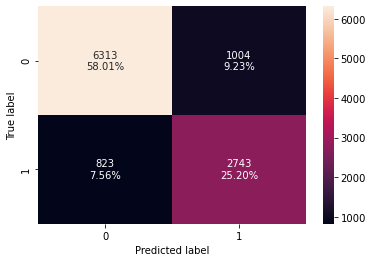

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [132]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83212,0.76921,0.73205,0.75017


<IPython.core.display.Javascript object>

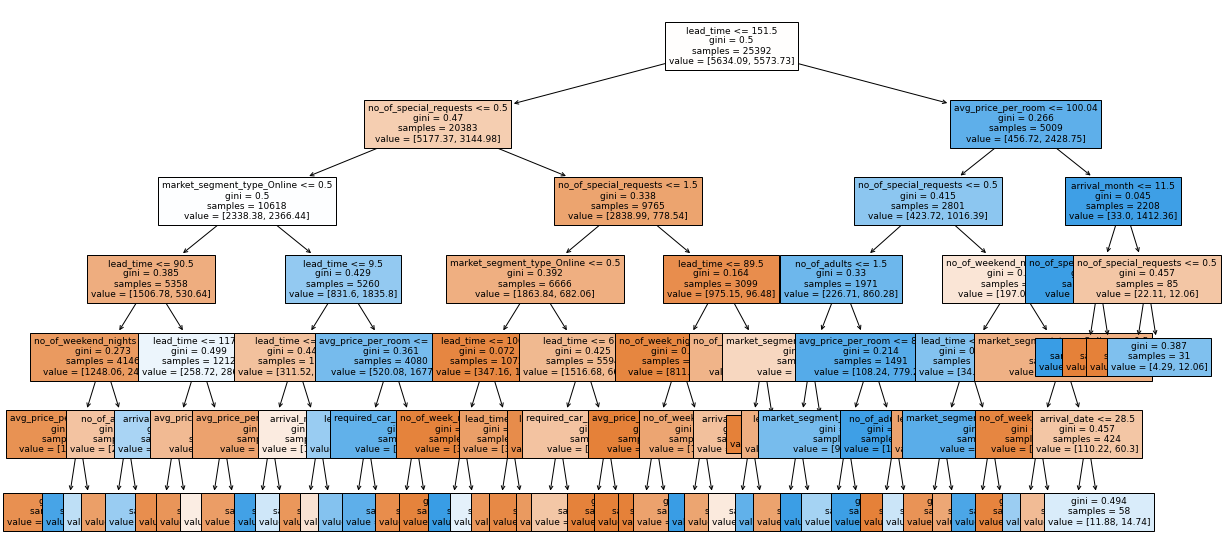

<IPython.core.display.Javascript object>

In [133]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [134]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- weights: [1045.77, 128.64] class: 0
|   |   |   |   |   |--- avg_price_per_room >  202.00
|   |   |   |   |   |   |--- weights: [0.66, 9.38] class: 1
|   |   |   |   |--- no_of_weekend_nights >  1.50
|   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |--- weights: [46.20, 69.01] class: 1
|   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |--- weights: [155.43, 36.85] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- arrival_month <= 10.50
|   |   |   |   |   |   |--- weights: [108.90, 225.12] class: 1
|   |   |   |   |   |--- arrival_month >  10.50
|   |   |   |   |   |   |--- weights: [19.14, 2.01] class: 0
|  

<IPython.core.display.Javascript object>

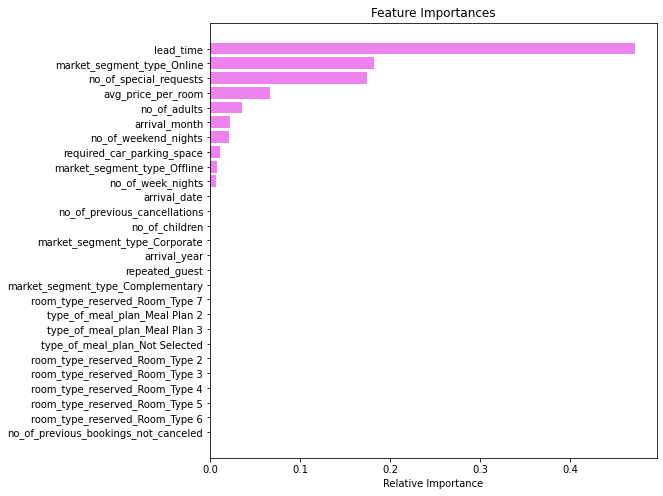

<IPython.core.display.Javascript object>

In [135]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the pre-prune decision tree model, `lead_time` is still the most important variable for predicting cancellation, followed by `market_segment_type_Online`, `no_of_special_requests`, and `avg_price_per_room`.

**Observations:** 
* The tree present similar scores for Recall, Accuracy, Precision, and F1 for both test and train set, meaning the model is not overfitted.
* The tree is still big but interpretation is not impossible. All in all the pre-pruning tunnig has returned good results.

#### Cost-Complexity Pruning

Cost Complexity uses the parameter `ccp_alpha` to prune the three. Greater values of ``ccp_alpha``increase the number of nodes pruned. 

In [136]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.33, 1: 0.67})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [137]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00833
1,0.00000,0.00833
2,0.00000,0.00833
3,0.00000,0.00833
4,0.00000,0.00833
...,...,...
1811,0.00935,0.32774
1812,0.00948,0.33722
1813,0.01257,0.34979
1814,0.03397,0.41773


<IPython.core.display.Javascript object>

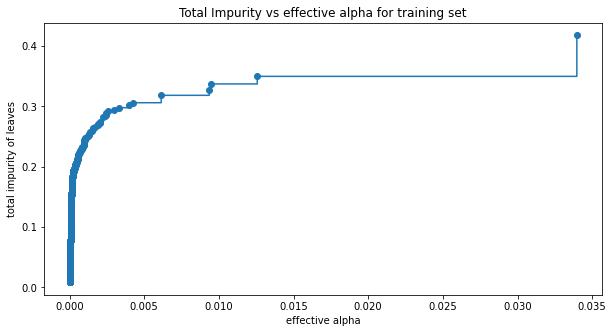

<IPython.core.display.Javascript object>

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree leaving the tree, ``clfs[-1]``, with one node.

In [139]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.33, 1: 0.67}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08225309170708167


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

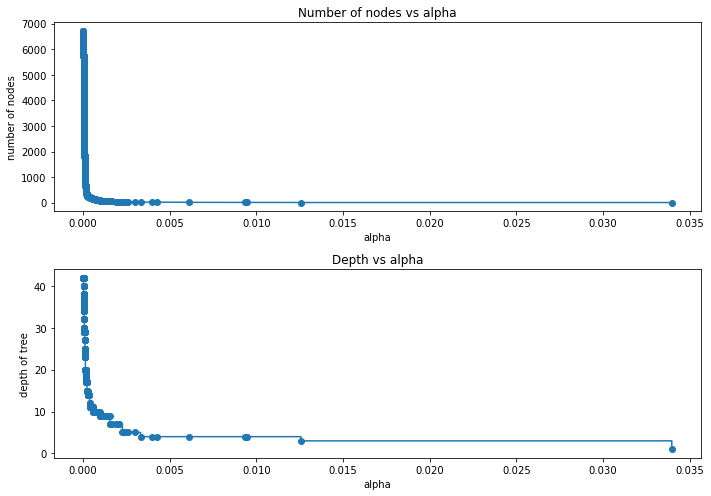

<IPython.core.display.Javascript object>

In [140]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [141]:
# F1 vs alpha
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

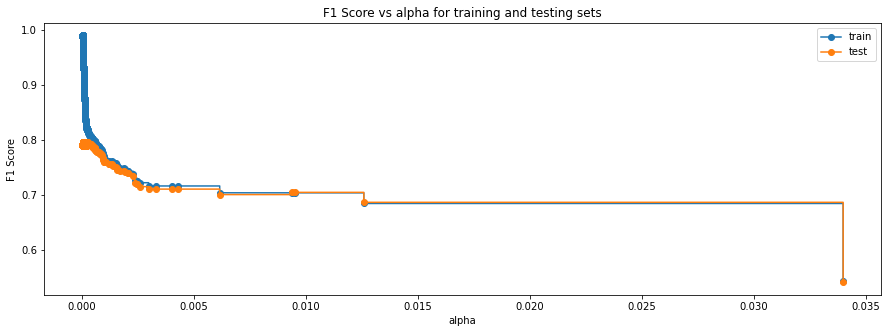

<IPython.core.display.Javascript object>

In [142]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [143]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00010720615685801425,
                       class_weight={0: 0.33, 1: 0.67}, random_state=1)


<IPython.core.display.Javascript object>

**Checking performance on training set**

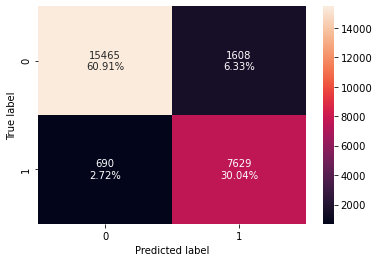

<IPython.core.display.Javascript object>

In [144]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [145]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90950,0.91706,0.82592,0.86910


<IPython.core.display.Javascript object>

**Checking performance on test set**

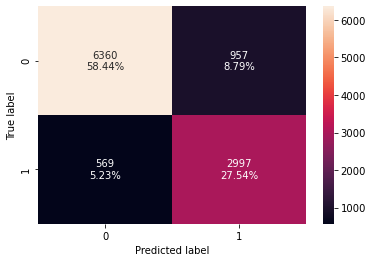

<IPython.core.display.Javascript object>

In [146]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [147]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.85978,0.84044,0.75797,0.79707


<IPython.core.display.Javascript object>

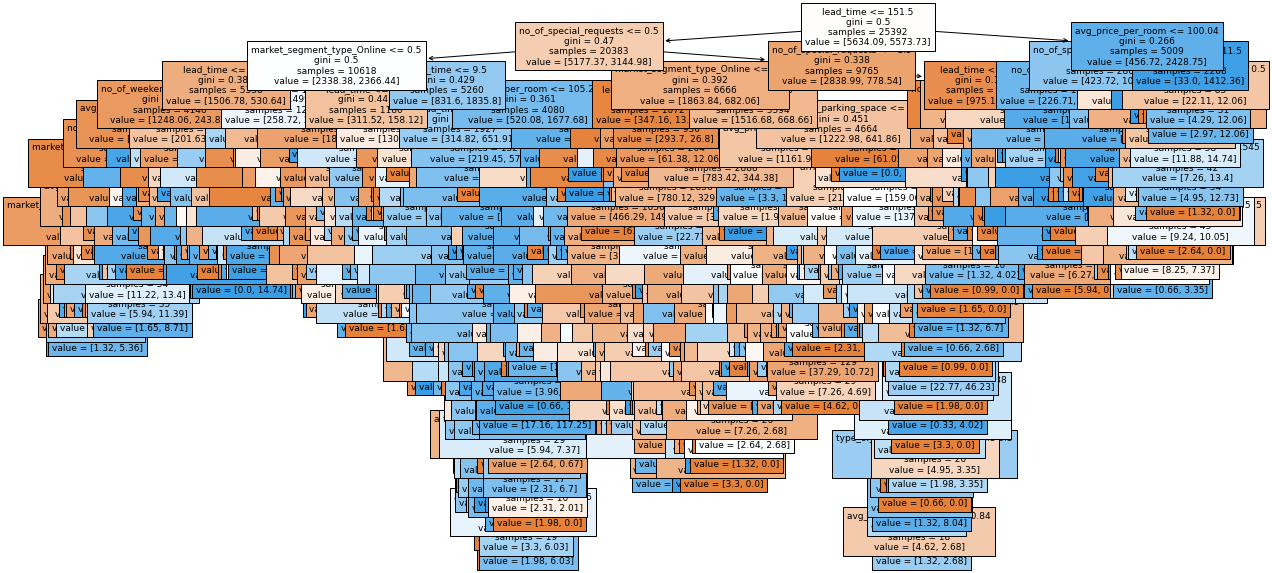

<IPython.core.display.Javascript object>

In [148]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [149]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 87.25
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [24.09, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  87.25
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |  

<IPython.core.display.Javascript object>

In [150]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.39057
market_segment_type_Online           0.12595
no_of_special_requests               0.12270
avg_price_per_room                   0.12223
arrival_month                        0.06359
arrival_date                         0.03774
no_of_adults                         0.03150
no_of_weekend_nights                 0.02515
arrival_year                         0.02182
no_of_week_nights                    0.02155
market_segment_type_Offline          0.01056
required_car_parking_space           0.00966
type_of_meal_plan_Not Selected       0.00425
type_of_meal_plan_Meal Plan 2        0.00255
room_type_reserved_Room_Type 4       0.00220
room_type_reserved_Room_Type 2       0.00198
market_segment_type_Corporate        0.00190
no_of_children                       0.00155
repeated_guest                       0.00153
room_type_reserved_Room_Type 5       0.00075
room_type_reserved_Room_Type 7       0.00028
no_of_prev

<IPython.core.display.Javascript object>

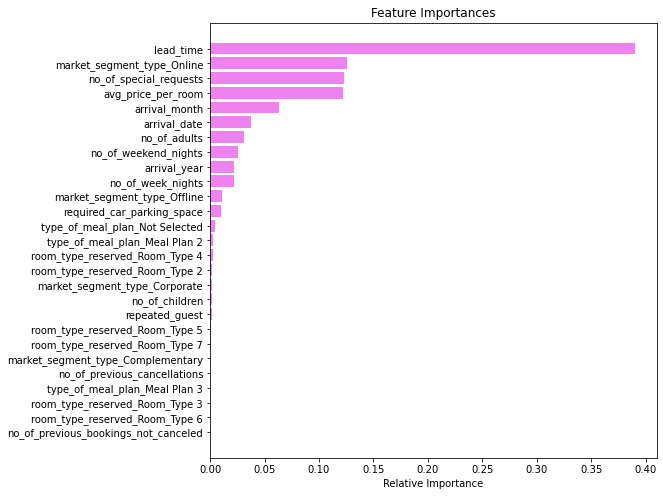

<IPython.core.display.Javascript object>

In [151]:
# importance of features in the tree building

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the post-prune decision tree model, `lead_time` is still the most important variable for predicting cancellation, followed by `market_segment_type_Online`, `no_of_special_requests`, and `avg_price_per_room`. 

**Observations:** 
* Altough the scores for Recall, Accuracy, Precision, and F1 for test and train set are not too different, test scores are lower. The difference is bigger than in the case or pre-pruning. 
* The tree is way too big for interpretation.

## Model Performance Comparison and Conclusions

In [152]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99358,0.83554,0.90950
Recall,0.99423,0.78339,0.91706
Precision,0.98629,0.73299,0.82592
F1,0.99024,0.75735,0.86910


<IPython.core.display.Javascript object>

In [153]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86281,0.83212,0.85978
Recall,0.79164,0.76921,0.84044
Precision,0.79009,0.73205,0.75797
F1,0.79087,0.75017,0.79707


<IPython.core.display.Javascript object>

### Selecting the best tree

* Considering the three trees performance on test set and the risk of overfitting the tree, pre-pruning provides the best results.
* Pre-pruning decision tree presents a good balance between accuracy (0.83), recall (0.76), precision (0.73), and F1 (0.75). 
* Although these scores are not as good as the scores for the other two trees, pre-pruning results in a tree that is possible to interpret.
* Pre-pruning tree also performs well in terms of reducing the error. Type I error (False Positives) is 9.23% and Type II error (False Negatives) is 7.56%.


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* Based on our two methods of analysis and prediction, we can identify some variables with a high influence over customers choices. Some of these predictors has a positive impact on cancellation and others a negative one. As a general advise, the client needs to foster reservations that have less chances of cancellation or more chances of not being cancel.
* According to the logit regression model, among other influential variables, the predictors with a highest negative impact over cancellation are `required_car_parking_space`, `repeated_guest`, `no_of_special_requests`, `room_type_reserved_Room_Type7`, and `market_segment_type_Offline`.
* The client can foster these type of reservations, for example making it easy to reserve a parking space, providing special discounts and offers to repeated guest, making it easy to add special requests during the booking process, and advertising in-person booking.
* According to our tree model, `lead_time` is the most important variable for predicting cancellation, followed by `market_segment_type_Online`, `no_of_special_requests`, and `avg_price_per_room`. 
* The client can consider these factors to lower the cancellation rate. For example, in case of reservations with a high lead time, the hotel can contact the customers a couple of weeks before arrival to re-asure they are still planing to go. This is also an oportunity to offer espcial offers for customers that are thinking about dropping their reservations. The customer can also reach out to customers with expensive reservations and offer them other options that we know have greater odds not to be cancell, for example special requests.